<a href="https://colab.research.google.com/github/thabied/Welding-Defects/blob/main/Welding_Defects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_folder = '/content/drive/My Drive/The Welding Defect Dataset'

print(os.listdir(dataset_folder))

['valid', 'train', 'test', 'data.yaml', 'new_data.yaml']


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
def visualize_random_train_image_with_bboxes(dataset_folder):
    # Define the path to the train image and label folders
    train_image_folder = os.path.join(dataset_folder, 'train/images')
    train_label_folder = os.path.join(dataset_folder, 'train/labels')

    # Get a list of all image files in the train folder
    image_files = [f for f in os.listdir(train_image_folder) if f.endswith('.jpg')]

    # Randomly select an image file
    selected_image_file = random.choice(image_files)

    # Construct the full path to the image file
    image_path = os.path.join(train_image_folder, selected_image_file)

    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display with matplotlib

    # Construct the path to the corresponding label file
    label_file = selected_image_file.replace('.jpg', '.txt')
    label_path = os.path.join(train_label_folder, label_file)

    # Load the labels and draw the bounding boxes
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Load the class names from the YAML file
    class_names = ['Bad Weld', 'Good Weld', 'Defect']

    for label in labels:
        label_data = label.strip().split()
        class_id = int(label_data[0])  # The class ID from the label file (first integer)
        x_center, y_center, width, height = map(float, label_data[1:])

        # Convert normalized coordinates to actual pixel values
        img_height, img_width, _ = image.shape
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        # Calculate the top-left corner of the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Put the label text using the correct class name
        label_text = class_names[class_id]
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

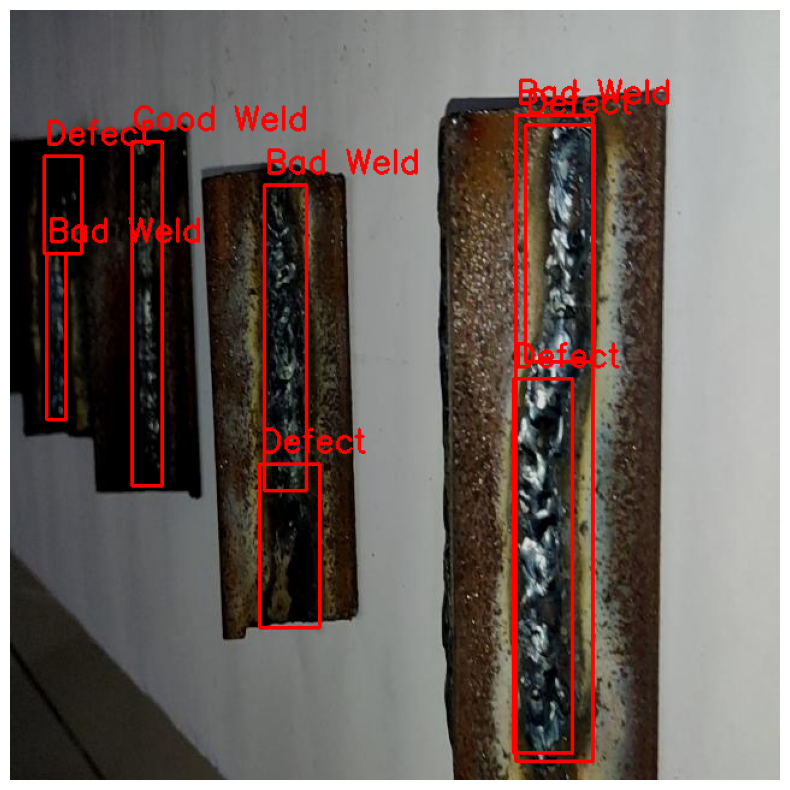

In [ ]:
visualize_random_train_image_with_bboxes('/content/drive/My Drive/The Welding Defect Dataset')

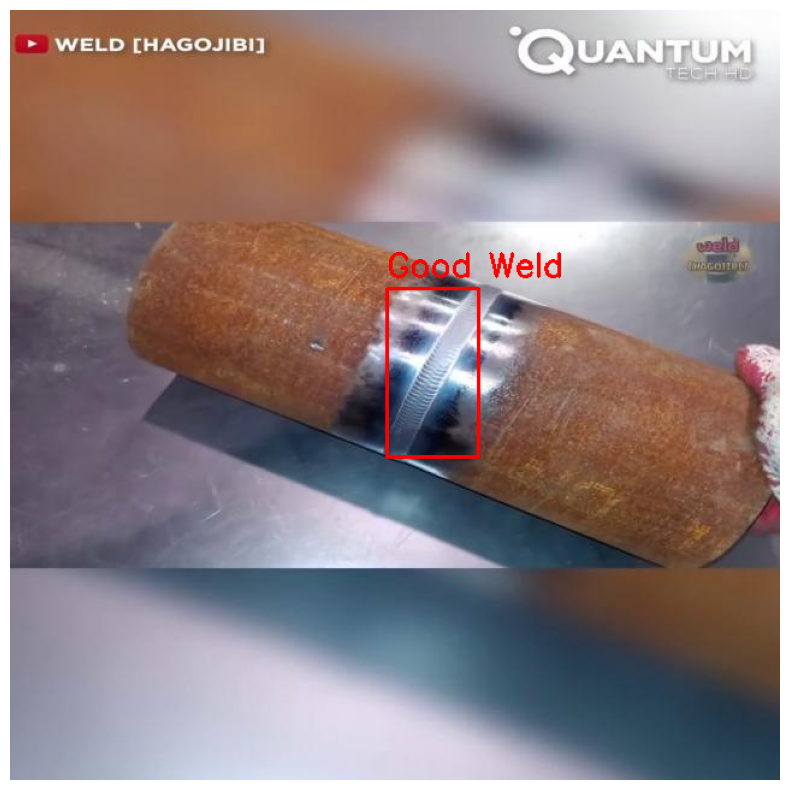

In [ ]:
visualize_random_train_image_with_bboxes('/content/drive/My Drive/The Welding Defect Dataset')

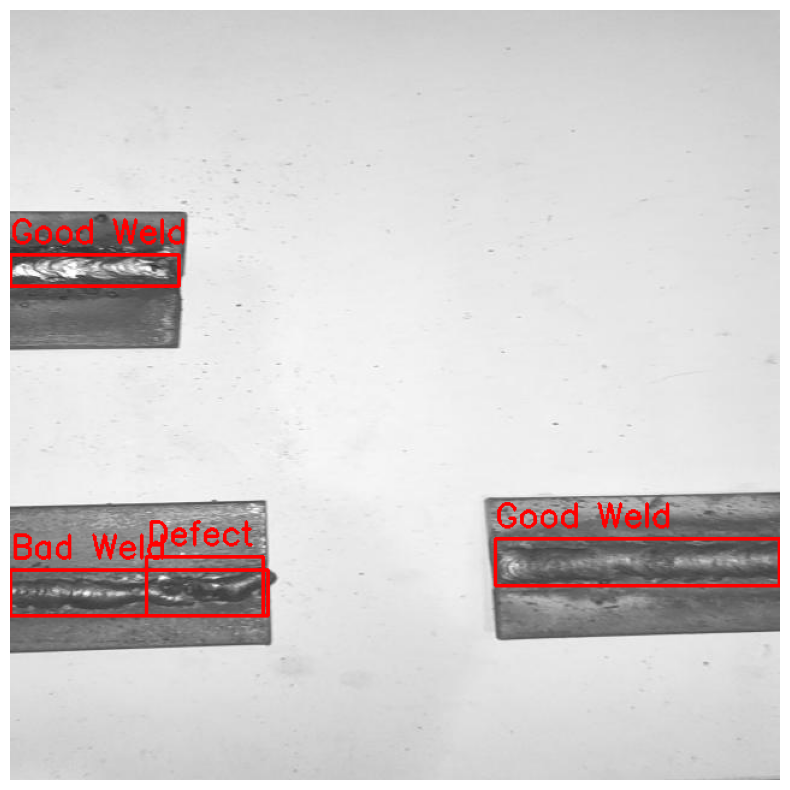

In [ ]:
visualize_random_train_image_with_bboxes('/content/drive/My Drive/The Welding Defect Dataset')

In [ ]:
# Define the path to your image file
image_path = '/content/drive/My Drive/The Welding Defect Dataset/train/images/0e538f39-1d30436c-c23_jpg.rf.3ce38b0e86b3cd83db06acc794de04f0.jpg'

# Load the image
img = cv2.imread(image_path)

# Get the image size (height, width, channels)
height, width, channels = img.shape

print(f"Image size: {width} x {height}")

Image size: 640 x 640


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 73.5MB/s]


In [ ]:
yaml_content = """
train: /content/drive/My Drive/The Welding Defect Dataset/train/images
val: /content/drive/My Drive/The Welding Defect Dataset/valid/images
test: /content/drive/My Drive/The Welding Defect Dataset/test/images

nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']
"""

# Define the path where you want to save the YAML file
yaml_file_path = '/content/drive/My Drive/The Welding Defect Dataset/new_data.yaml'

# Save the YAML content to a file
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)

In [ ]:
model.train(data=yaml_file_path, epochs=100, imgsz=160)

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/The Welding Defect Dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]


                   all        176        573      0.521      0.498      0.489      0.269
              Bad Weld         87        127      0.502      0.732      0.665      0.388
             Good Weld        119        253      0.674      0.621      0.649      0.366
                Defect         90        193      0.388       0.14      0.152      0.053
Speed: 0.0ms preprocess, 3.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /content/drive/MyDrive/The Welding Defect Dataset/test/images/bad_weld_vid374_jpeg_jpg.rf.d1c904ca6a097b2c51665238ba9e1147.jpg: 160x160 1 Bad Weld, 1 Defect, 18.0ms
Speed: 0.9ms preprocess, 18.0ms inference, 0.9ms postprocess per image at shape (1, 3, 160, 160)


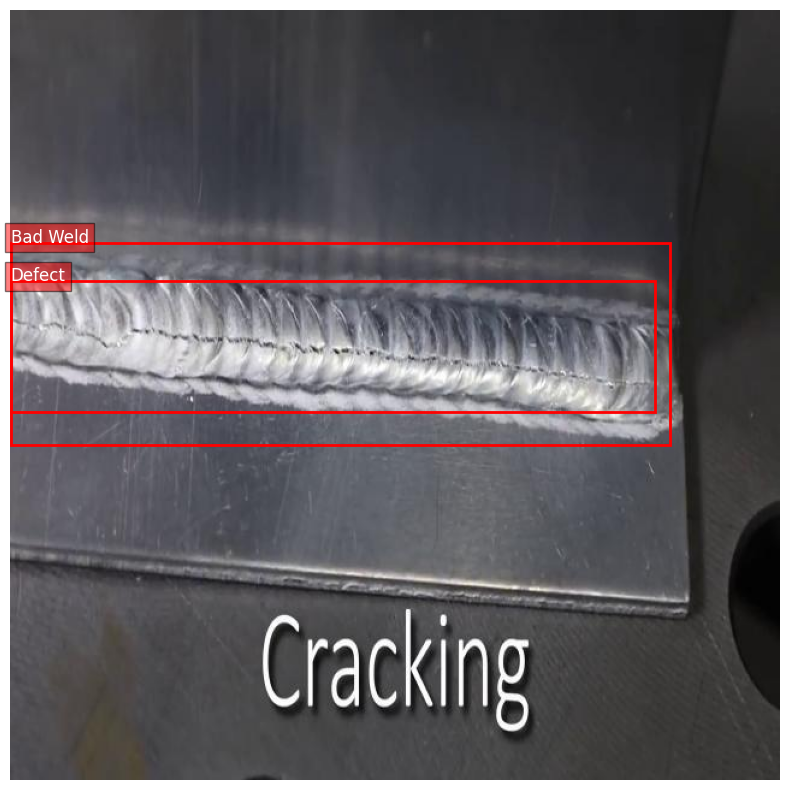

Predicted class 1: Bad Weld
Predicted class 2: Defect


In [ ]:
test_image_path = '/content/drive/MyDrive/The Welding Defect Dataset/test/images/bad_weld_vid374_jpeg_jpg.rf.d1c904ca6a097b2c51665238ba9e1147.jpg'

results = model(test_image_path)

# Extract the results
boxes = results[0].boxes  # Bounding boxes
classes = results[0].names  # Class names
class_ids = boxes.cls.tolist()  # Class IDs

# Display the image with bounding boxes
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib

# Plot the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(img)

for box in boxes:
    # Extract bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    # Extract the predicted class ID
    class_id = int(box.cls[0])

    # Get the class name
    class_name = classes[class_id]

    # Draw the bounding box and label on the image
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))
    plt.text(x1, y1, class_name, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()

# Print the predicted classes
for i, class_id in enumerate(class_ids):
    print(f"Predicted class {i+1}: {classes[int(class_id)]}")


In [ ]:
from ultralytics import YOLO

In [ ]:
dep_model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
# Load the model
dep_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Path to the test image
image_path = '/content/drive/MyDrive/The Welding Defect Dataset/test/images/bad_weld_vid166_jpeg_jpg.rf.525052424b574a43de777660f6cb2d10.jpg'

# Run inference
results = dep_model(image_path)

# Get the original image dimensions
original_img = cv2.imread(image_path)
original_height, original_width = original_img.shape[:2]

# Process results
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs

    if len(boxes) == 0:
        print("No detections found.")
    else:
        for box in boxes:
            # Extract class
            cls = int(box.cls[0])
            class_name = dep_model.names[cls]

            # Extract confidence
            conf = float(box.conf[0])

            # Extract bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format

            # Convert normalized coordinates to pixel values
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

            print(f"Class: {class_name}, Confidence: {conf:.2f}")
            print(f"Bounding Box: (x1={x1}, y1={y1}, x2={x2}, y2={y2})")
            print("---")

# Optionally, you can visualize the results
result_image = results[0].plot()
cv2.imwrite('result_image.jpg', result_image)
print("Result image saved as 'result_image.jpg'")


image 1/1 /content/drive/MyDrive/The Welding Defect Dataset/test/images/bad_weld_vid166_jpeg_jpg.rf.525052424b574a43de777660f6cb2d10.jpg: 160x160 1 Bad Weld, 20.6ms
Speed: 0.7ms preprocess, 20.6ms inference, 0.8ms postprocess per image at shape (1, 3, 160, 160)
Class: Bad Weld, Confidence: 0.86
Bounding Box: (x1=189, y1=241, x2=369, y2=344)
---
Result image saved as 'result_image.jpg'


In [ ]:
model.export(format='onnx', dynamic=False, imgsz=(160,160))

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 160, 160) BCHW and output shape(s) (1, 7, 525) (5.9 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 0.6s, saved as 'runs/detect/train/weights/best.onnx' (11.5 MB)

Export complete (1.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=160  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=160 data=/content/drive/My Drive/The Welding Defect Dataset/new_data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'

In [ ]:
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
import onnxruntime as ort
import numpy as np

In [ ]:
# Path to the ONNX model
model_path = '/content/runs/detect/train/weights/best.onnx'

# Load the ONNX model
ort_session = ort.InferenceSession(model_path)

In [ ]:
def preprocess_image(image_path, input_size=(160, 160)):
    # Read the image
    img = cv2.imread(image_path)

    # Resize the image
    img = cv2.resize(img, input_size)

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img = img.astype(np.float32) / 255.0

    # Transpose the image from HWC to CHW format
    img = img.transpose(2, 0, 1)

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    return img

In [ ]:
# Example usage:
image_path = '/content/drive/MyDrive/The Welding Defect Dataset/test/images/bad_weld_vid166_jpeg_jpg.rf.525052424b574a43de777660f6cb2d10.jpg'
preprocessed_image = preprocess_image(image_path)
print("Preprocessed image shape:", preprocessed_image.shape)

Preprocessed image shape: (1, 3, 160, 160)


In [ ]:
input_name = ort_session.get_inputs()[0].name

# Run inference
outputs = ort_session.run(None, {input_name: preprocessed_image})

In [ ]:
outputs[0].shape

(1, 7, 525)

In [ ]:
output = outputs[0]  # This gives you the (7, 525) tensor

# To look at the first detection (first column of the 7x525 matrix)
first_detection = output[:, 0]

print("Shape of first detection:", first_detection.shape)
print("Contents of first detection:", first_detection)

Shape of first detection: (1, 525)
Contents of first detection: [[     9.5276      20.972      23.689      27.073      34.153      38.697        54.2      61.649      70.565      77.143      80.684      95.769      108.26      113.85      121.22       128.4      130.38      133.01      142.16      145.74      3.1952      20.203      22.513      25.253      30.835      39.105
       54.902      60.236      71.282      77.055      81.119      89.402      107.74      114.55      121.27      126.61      130.34      132.88      140.66      151.66      2.8188      19.001      21.968      24.239      29.799      45.867      56.701      60.105      72.698      77.308        81.2      88.953
       105.58      117.11      122.03      126.42      130.24      132.75       142.9      153.54      2.6544      17.895      21.167      24.016      28.862      45.156      56.795      60.364      69.491      78.504      81.681       89.85      105.08      113.57      122.26      126.77      129.51      1

In [ ]:
def process_output(output, conf_threshold=0.25, iou_threshold=0.45):
    predictions = np.squeeze(output[0])  # Remove batch dimension

    # Filter out object confidence scores below threshold
    scores = np.max(predictions[:, 4:], axis=1)
    predictions = predictions[scores > conf_threshold, :]
    scores = scores[scores > conf_threshold]

    if len(scores) == 0:
        return []

    # Get the class with the highest score
    class_ids = np.argmax(predictions[:, 4:], axis=1)

    # Get bounding boxes
    boxes = predictions[:, :4]

    # Apply non-maximum suppression
    indices = nms(boxes, scores, iou_threshold)

    results = []
    for i in indices:
        box = boxes[i]
        score = scores[i]
        class_id = class_ids[i]

        # Convert box from xywh to xyxy format
        x, y, w, h = box
        x1, y1 = x - w/2, y - h/2
        x2, y2 = x + w/2, y + h/2

        results.append({
            'class_id': int(class_id),
            'confidence': float(score),
            'bbox': [float(x1), float(y1), float(x2), float(y2)]
        })

    return results

def nms(boxes, scores, iou_threshold):
    x1 = boxes[:, 0] - boxes[:, 2] / 2
    y1 = boxes[:, 1] - boxes[:, 3] / 2
    x2 = boxes[:, 0] + boxes[:, 2] / 2
    y2 = boxes[:, 1] + boxes[:, 3] / 2

    areas = (x2 - x1) * (y2 - y1)
    order = scores.argsort()[::-1]

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)

        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1)
        h = np.maximum(0.0, yy2 - yy1)
        inter = w * h

        ovr = inter / (areas[i] + areas[order[1:]] - inter)
        inds = np.where(ovr <= iou_threshold)[0]
        order = order[inds + 1]

    return keep

# Use the function
predictions = process_output(outputs, conf_threshold=0.25, iou_threshold=0.45)

# Print the results
for pred in predictions:
    print(f"Class: {pred['class_id']}, Confidence: {pred['confidence']:.2f}, BBox: {pred['bbox']}")

Class: 499, Confidence: 296.83, BBox: [17.651400566101074, 17.01340961456299, 39.83596897125244, 32.36889171600342]
Class: 502, Confidence: 248.46, BBox: [16.585922241210938, 16.87552261352539, 61.11572265625, 69.98604202270508]
Class: 491, Confidence: 158.83, BBox: [7.3671441078186035, 8.427281856536865, 18.29344129562378, 15.878706455230713]
Class: 215, Confidence: 157.40, BBox: [3.70882511138916, 5.194562911987305, 24.29221820831299, 30.51703453063965]
Class: 185, Confidence: 0.86, BBox: [7.972121238708496e-06, 8.448958396911621e-06, 1.6286969184875488e-05, 1.4916062355041504e-05]
